In [1]:
import os
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from statsmodels.graphics.tsaplots import plot_predict, plot_acf, plot_pacf
from sklearn.utils import shuffle
import math
from scipy import stats


In [2]:
data = pd.read_csv('/Users/_fangkhai/Documents/Computer Science Semester 5/Introduction to Data Science/Assignment Dataset/INFY Historical Data.csv').fillna(0)
data["Date"] = pd.to_datetime(data.Date)
data.set_index ("Date", inplace = True)
data.dtypes

Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [3]:
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-12-31,"1,255.80","1,243.00","1,258.40","1,239.00",7.43M,0.72%
2020-12-30,"1,246.80","1,253.00","1,253.30","1,238.15",5.19M,-0.28%
2020-12-29,"1,250.30","1,235.00","1,254.45","1,235.00",6.88M,0.81%
2020-12-28,"1,240.30","1,238.45","1,248.00","1,236.00",4.61M,0.34%
2020-12-24,"1,236.05","1,249.90","1,249.90","1,226.00",7.31M,-1.36%
...,...,...,...,...,...,...
2005-01-07,127.17,126.19,128.05,123.71,33.50M,0.35%
2005-01-06,126.73,126.58,129.85,123.90,27.03M,-0.43%
2005-01-05,127.28,128.05,128.98,124.09,22.20M,-1.79%


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3968 entries, 2020-12-31 to 2005-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     3968 non-null   object
 1   Open      3968 non-null   object
 2   High      3968 non-null   object
 3   Low       3968 non-null   object
 4   Vol.      3968 non-null   object
 5   Change %  3968 non-null   object
dtypes: object(6)
memory usage: 217.0+ KB


In [5]:
data["Price"] = data["Price"].str.replace(",", "")
data["Open"] = data["Open"].str.replace(",", "")
data["High"] = data["High"].str.replace(",", "")
data["Low"] = data["Low"].str.replace(",", "")
data["Vol."] = data["Vol."].str.replace("M", "")
data["Change %"] = data["Change %"].str.replace("%", "")

In [6]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

<AxesSubplot:>

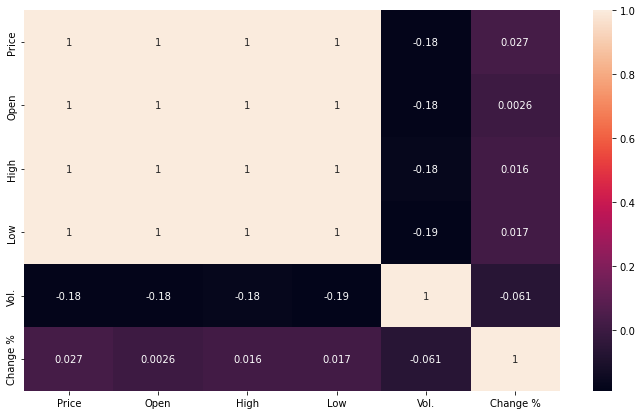

In [7]:
corr = data.corr()
plt.figure(figsize = (12, 7))
sns.heatmap(corr, annot = True)

In [8]:
data.isnull().sum()

Price        0
Open         0
High         0
Low          0
Vol.        19
Change %     0
dtype: int64

In [9]:
data.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

In [10]:
data = data.fillna(data["Vol."].mean())

In [11]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [12]:
z = np.abs(stats.zscore(data))
z

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-12-31,4.011795,3.952192,3.961247,3.994128,0.377125,0.331705
2020-12-30,3.968926,3.999841,3.937196,3.990039,0.647224,0.183571
2020-12-29,3.985597,3.914072,3.942619,3.974887,0.443444,0.378080
2020-12-28,3.937966,3.930511,3.912202,3.979697,0.717160,0.135900
2020-12-24,3.917722,3.985070,3.921162,3.931595,0.391595,0.740069
...,...,...,...,...,...,...
2005-01-07,1.364090,1.369354,1.369411,1.370711,2.766393,0.141053
2005-01-06,1.366186,1.367496,1.360922,1.369798,1.986241,0.260862
2005-01-05,1.363566,1.360491,1.365025,1.368884,1.403840,0.961637


In [13]:
(np.abs(stats.zscore(data)) > 3).sum()

Price       61
Open        60
High        61
Low         59
Vol.        53
Change %    60
dtype: int64

In [14]:
data_clean = data[((np.abs(stats.zscore(data)))<3).all(axis=1)]
data_clean

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-10-01,1017.65,1020.60,1026.50,1011.75,5.56,0.93
2020-09-30,1008.25,1009.00,1023.95,1005.00,8.05,-0.07
2020-09-29,1009.00,1018.00,1028.00,1004.10,8.71,-0.14
2020-09-28,1010.40,1014.80,1016.15,998.50,8.55,-0.10
2020-09-25,1011.45,975.80,1014.90,975.00,13.31,3.70
...,...,...,...,...,...,...
2005-01-07,127.17,126.19,128.05,123.71,33.50,0.35
2005-01-06,126.73,126.58,129.85,123.90,27.03,-0.43
2005-01-05,127.28,128.05,128.98,124.09,22.20,-1.79


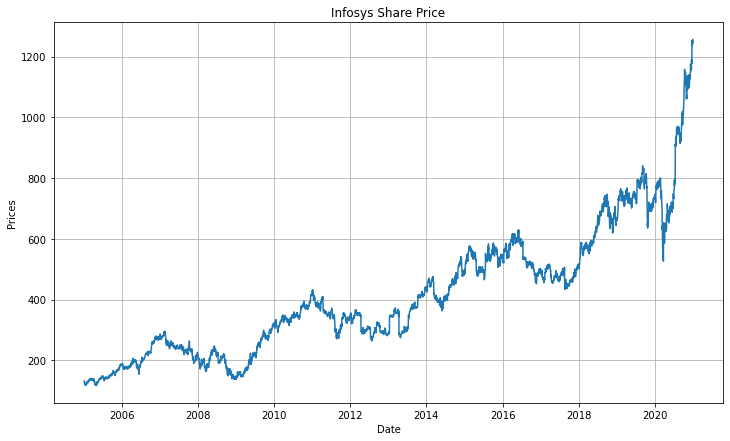

In [15]:
plt.figure(figsize=(12,7))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Prices")
plt.plot(data["Price"])
plt.title("Infosys Share Price")
plt.show()

<AxesSubplot:ylabel='Density'>

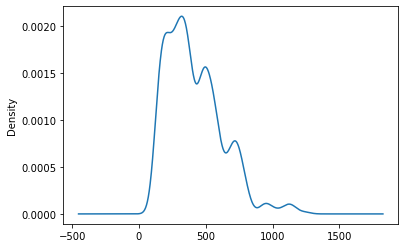

In [16]:
df = data["Price"]
df.plot(kind = "kde")

### Determine MA (Parameter q)

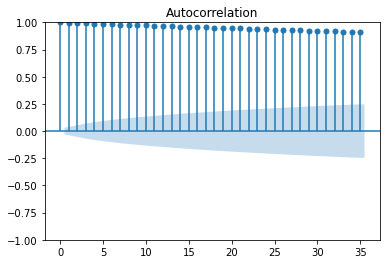

In [17]:
plot_acf(data["Price"], lags = 35)
plt.show()

### Determine AR (Parameter p)

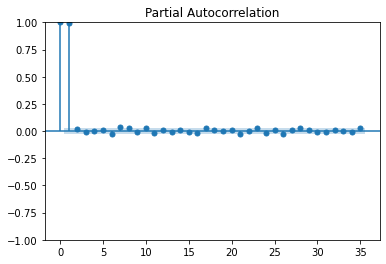

In [18]:
plot_pacf(data["Price"], lags = 35)
plt.show()

### SelectKBest

In [19]:
open_price_crosstab = pd.crosstab(data["Open"], data["Price"], margins = True)
open_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Open,,,,,,,,,,,,,,,,,,,,,
117.63,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
117.82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.38,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.44,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.75,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1243.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1249.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
high_price_crosstab = pd.crosstab(data["High"], data["Price"], margins = True)
high_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
High,,,,,,,,,,,,,,,,,,,,,
118.75,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.18,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.37,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.99,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1254.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1258.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [21]:
low_price_crosstab = pd.crosstab(data["Low"], data["Price"], margins = True)
low_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Low,,,,,,,,,,,,,,,,,,,,,
116.28,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
116.36,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
116.45,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
116.7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117.2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1236.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1238.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [22]:
vol_price_crosstab = pd.crosstab(data["Vol."], data["Price"], margins = True)
vol_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Vol.,,,,,,,,,,,,,,,,,,,,,
1.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92.85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
164.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
change_price_crosstab = pd.crosstab(data["Change %"], data["Price"], margins = True)
change_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Change %,,,,,,,,,,,,,,,,,,,,,
-21.26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-16.19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-13.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-12.66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-10.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
shuffled_data = shuffle(data, random_state = 800)

#X = Independent Variable
target_col = "Price"
X = data.drop("Price", axis = 1)

#y = Dependent Variable
y = shuffled_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 800)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3174, 5) (794, 5) (3174,) (794,)


In [25]:
X_n = SelectKBest(f_classif, k = 1).fit_transform(X, y)
X_n.shape

#Another method (Giving Same Results)

X_new = SelectKBest(f_classif, k = 1).fit(X_train, y_train)
X_train.columns[X_new.get_support()]

Index(['Low'], dtype='object')

In [26]:
pd.crosstab(np.squeeze(X_n), np.squeeze(y))

Price,117.00,117.91,118.16,118.17,118.21,118.60,118.62,118.68,118.70,118.76,...,1175.20,1177.30,1189.80,1220.50,1236.05,1240.30,1246.80,1250.30,1253.05,1255.80
row_0,,,,,,,,,,,,,,,,,,,,,
116.28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116.36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116.70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117.20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1235.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


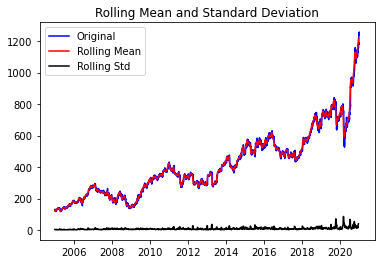

Results of dickey fuller test
Test Statistics                  -3.553030
p-value                           0.006725
No. of lags used                 26.000000
Number of observations used    3941.000000
critical value (1%)              -3.432010
critical value (5%)              -2.862274
critical value (10%)             -2.567161
dtype: float64


In [27]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #Perform dickey fuller test
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(data["Price"])

In [28]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [29]:
stepwise_fit = auto_arima(data["High"], trace=True, suppress_warning=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27595.108, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27604.025, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27599.968, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27599.610, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27607.067, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27593.097, Time=1.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=27598.406, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27591.147, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27593.096, Time=0.98 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27598.835, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=27593.954, Time=0.26 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.710 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:       

In [37]:
#For 15 Years
model = sm.tsa.arima.ARIMA(data["High"], order = (1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/Users/_fangkhai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/_fangkhai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/_fangkhai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/_fangkhai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 3968
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13793.977
Date:                Sun, 09 Apr 2023   AIC                          27593.954
Time:                        15:55:45   BIC                          27612.811
Sample:                             0   HQIC                         27600.641
                               - 3968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7261      0.054    -13.400      0.000      -0.832      -0.620
ma.L1          0.7713      0.052     14.878      0.000       0.670       0.873
sigma2        61.3426      0.411    149.340      0.0

### Predict

In [38]:
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end)
predictions

Date
2008-02-29    191.577844
2008-02-28    198.651016
2008-02-27    201.025932
2008-02-26    209.558613
2008-02-25    207.051032
                 ...    
2005-01-07    130.347576
2005-01-06    127.853479
2005-01-05    130.082965
2005-01-04    128.760979
2005-01-03    132.065085
Name: predicted_mean, Length: 794, dtype: float64

In [39]:
s = pd.Series(predictions, index = data.index[-150:]) 
s

Date
2005-08-04    143.551900
2005-08-03    147.947468
2005-08-02    146.418915
2005-08-01    143.138609
2005-07-29    140.921141
                 ...    
2005-01-07    130.347576
2005-01-06    127.853479
2005-01-05    130.082965
2005-01-04    128.760979
2005-01-03    132.065085
Name: predicted_mean, Length: 150, dtype: float64

<AxesSubplot:xlabel='Date'>

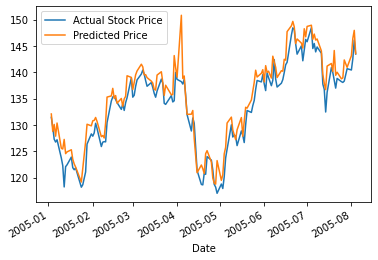

In [40]:
data["Price"][-150:].plot(label = "Actual Stock Price", legend = True)
s.plot(label = "Predicted Price", legend = True)

In [41]:
mape = np.mean(np.abs((test["Price"] - predictions) / test["Price"])) * 100
mape

1.6451302857273116

In [42]:
mae = mean_absolute_error(test["Price"], predictions)
mae

3.220022301406728

In [43]:
mse = mean_squared_error(test["Price"], predictions)
rmse = math.sqrt(mse)
rmse

4.374781550228698